# UAS Machine Learning
## KELOMPOK 1
## IDENTITAS
- MOCHAMMAD HAIRULLAH - 2041720074 - TI-3H<br>
- CINTYA APRILA FANDINI - 2041720074 - TI-3H<br>
- FAIZA KURNIA - 2041720074 - TI-3H<br>

## PENYELESAIAN TERBAIK : NAIVE BAYES (Klasifikasi)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### IDENTIFIKASI DATA

In [35]:
import numpy as np
import pandas as pd

In [36]:
path = './dataset/Data-Historis-BBRI-Dataset.xlsx'
df = pd.read_excel(path)
df = pd.DataFrame(df)
df.columns = ['NO', 'Tanggal', 'Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah', 'Vol.', 'Perubahan%', 'Predict']
df.head()

,NO,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%,Predict
0,1.0,15/11/2022,4580.0,4580.0,4610.0,4560.0,71.99,"0,00%",Tetap
1,2.0,14/11/2022,4580.0,4620.0,4640.0,4550.0,156.89,"-1,51%",Turun
2,3.0,11/11/2022,4650.0,4620.0,4650.0,4590.0,153.24,"2,65%",Naik
3,4.0,10/11/2022,4530.0,4560.0,4580.0,4520.0,173.83,"-2,58%",Turun
4,5.0,09/11/2022,4650.0,4600.0,4650.0,4600.0,94.72,"0,65%",Naik


In [37]:
df.dtypes

NO            float64
Tanggal        object
Terakhir      float64
Pembukaan     float64
Tertinggi     float64
Terendah      float64
Vol.          float64
Perubahan%     object
Predict        object
dtype: object

In [38]:
df.shape

# info df
df.info()

# deskripsi df
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NO          451 non-null    float64
 1   Tanggal     451 non-null    object 
 2   Terakhir    451 non-null    float64
 3   Pembukaan   451 non-null    float64
 4   Tertinggi   451 non-null    float64
 5   Terendah    451 non-null    float64
 6   Vol.        451 non-null    float64
 7   Perubahan%  451 non-null    object 
 8   Predict     451 non-null    object 
dtypes: float64(6), object(3)
memory usage: 31.8+ KB


,NO,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000
mean,226.000000,4258.308204,4267.478936,4308.667406,4214.598670,159.025942
std,130.336743,301.819991,304.271956,304.042454,299.104494,87.689332
min,1.000000,3570.000000,3510.000000,3580.000000,3500.000000,27.680000
25%,113.500000,4080.000000,4090.000000,4128.500000,4050.000000,100.270000
50%,226.000000,4280.000000,4280.000000,4330.000000,4250.000000,137.150000
75%,338.500000,4517.000000,4517.000000,4573.000000,4474.000000,188.550000
max,451.000000,4940.000000,4900.000000,4980.000000,4860.000000,634.550000


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


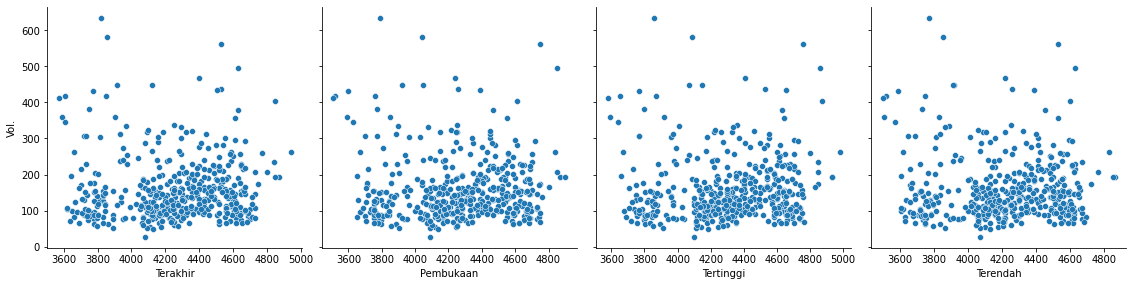

In [39]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.pairplot(df, x_vars=['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah'], 
             y_vars='Vol.', size=4, aspect=1, kind='scatter')
plt.show()

### MENCARI MEAN [RUMUS]

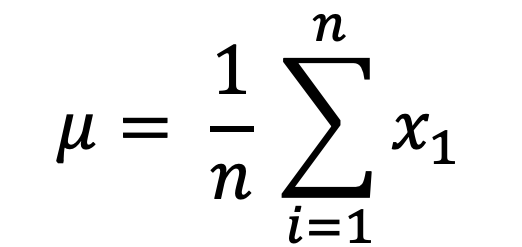

### MENCARI STDEV [RUMUS]

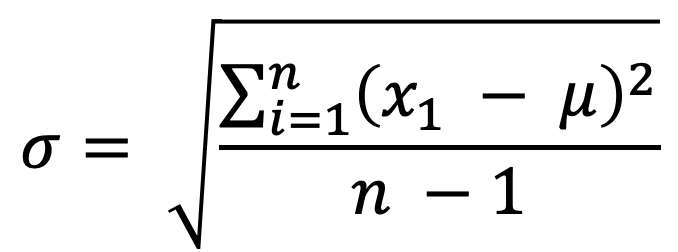

#### Mencari Mean dan Standar Deviasi dari dataset berdasarkan kolomnya

##### Closed Price (Harga Trakhir)

In [40]:
# Harga Terakhir (Closed Price)

def closedPrice(x):
  return df[(df['Predict'] == x)]

closedPrice_naik = closedPrice('Naik')['Terakhir'].drop_duplicates()
closedPrice_tetap = closedPrice('Tetap')['Terakhir'].drop_duplicates()
closedPrice_turun = closedPrice('Turun')['Terakhir'].drop_duplicates()

def meanClosedPrice(x, y):
  return x / y

mean_closedPrice_naik = meanClosedPrice(closedPrice_naik.sum(), closedPrice_naik.count())
mean_closedPrice_tetap = meanClosedPrice(closedPrice_tetap.sum(), closedPrice_tetap.count())
mean_closedPrice_turun = meanClosedPrice(closedPrice_turun.sum(), closedPrice_turun.count())

std_closedPrice_naik = closedPrice_naik.std()
std_closedPrice_tetap = closedPrice_tetap.std()
std_closedPrice_turun = closedPrice_turun.std()

print('--- Mencari Mean dan STDEV ---')
print('--- NAIK ---')
print('MEAN   : ', mean_closedPrice_naik)
print('STDEV  : ', std_closedPrice_naik, '\n')
print('--- TETAP ---')
print('MEAN   : ', mean_closedPrice_tetap)
print('STDEV  : ', std_closedPrice_tetap, '\n')
print('--- TURUN ---')
print('MEAN   : ', mean_closedPrice_turun)
print('STDEV  : ', std_closedPrice_turun)

--- Mencari Mean dan STDEV ---
--- NAIK ---
MEAN   :  4254.3983739837395
STDEV  :  334.9059505817108 

--- TETAP ---
MEAN   :  4328.3
STDEV  :  266.50372104969443 

--- TURUN ---
MEAN   :  4212.528455284553
STDEV  :  331.67284209542976


##### Open Price (Harga Pembukaan)

In [41]:
# Harga Pembukaan (Open Price)

def openPrice(x):
  return df[(df['Predict'] == x)]

openPrice_naik = openPrice('Naik')['Pembukaan'].drop_duplicates()
openPrice_tetap = openPrice('Tetap')['Pembukaan'].drop_duplicates()
openPrice_turun = openPrice('Turun')['Pembukaan'].drop_duplicates()

def meanOpenPrice(x, y):
  return x / y

mean_openPrice_naik = meanOpenPrice(openPrice_naik.sum(), openPrice_naik.count())
mean_openPrice_tetap = meanOpenPrice(openPrice_tetap.sum(), openPrice_tetap.count())
mean_openPrice_turun = meanOpenPrice(openPrice_turun.sum(), openPrice_turun.count())

std_openPrice_naik = openPrice_naik.std()
std_openPrice_tetap = openPrice_tetap.std()
std_openPrice_turun = openPrice_turun.std()

print('--- Mencari Mean dan STDEV ---')
print('--- NAIK ---')
print('MEAN   : ', mean_openPrice_naik)
print('STDEV  : ', std_openPrice_naik, '\n')
print('--- TETAP ---')
print('MEAN   : ', mean_openPrice_tetap)
print('STDEV  : ', std_openPrice_tetap, '\n')
print('--- TURUN ---')
print('MEAN   : ', mean_openPrice_turun)
print('STDEV  : ', std_openPrice_turun)

--- Mencari Mean dan STDEV ---
--- NAIK ---
MEAN   :  4252.2109375
STDEV  :  332.8272506527477 

--- TETAP ---
MEAN   :  4336.3
STDEV  :  281.7556269772324 

--- TURUN ---
MEAN   :  4238.3387096774195
STDEV  :  337.1909036158128


##### High Price (Harga Tertinggi)

In [42]:
# Harga Tertinggi (High Price)

def highPrice(x):
  return df[(df['Predict'] == x)]

highPrice_naik = highPrice('Naik')['Tertinggi'].drop_duplicates()
highPrice_tetap = highPrice('Tetap')['Tertinggi'].drop_duplicates()
highPrice_turun = highPrice('Turun')['Tertinggi'].drop_duplicates()

def meanHighPrice(x, y):
  return x / y

mean_highPrice_naik = meanHighPrice(highPrice_naik.sum(), highPrice_naik.count())
mean_highPrice_tetap = meanHighPrice(highPrice_tetap.sum(), highPrice_tetap.count())
mean_highPrice_turun = meanHighPrice(highPrice_turun.sum(), highPrice_turun.count())

std_highPrice_naik = highPrice_naik.std()
std_highPrice_tetap = highPrice_tetap.std()
std_highPrice_turun = highPrice_turun.std()

print('--- Mencari Mean dan STDEV ---')
print('--- NAIK ---')
print('MEAN   : ', mean_highPrice_naik)
print('STDEV  : ', std_highPrice_naik, '\n')
print('--- TETAP ---')
print('MEAN   : ', mean_highPrice_tetap)
print('STDEV  : ', std_highPrice_tetap, '\n')
print('--- TURUN ---')
print('MEAN   : ', mean_highPrice_turun)
print('STDEV  : ', std_highPrice_turun)

--- Mencari Mean dan STDEV ---
--- NAIK ---
MEAN   :  4286.376068376068
STDEV  :  343.03452441347866 

--- TETAP ---
MEAN   :  4375.7
STDEV  :  270.61783221197953 

--- TURUN ---
MEAN   :  4254.916666666667
STDEV  :  331.9324013223461


##### Low Price (Harga Terendah)

In [43]:
# Harga Terendah (Low Price)

def lowPrice(x):
  return df[(df['Predict'] == x)]

lowPrice_naik = lowPrice('Naik')['Terendah'].drop_duplicates()
lowPrice_tetap = lowPrice('Tetap')['Terendah'].drop_duplicates()
lowPrice_turun = lowPrice('Turun')['Terendah'].drop_duplicates()

def meanLowPrice(x, y):
  return x / y

mean_lowPrice_naik = meanLowPrice(lowPrice_naik.sum(), lowPrice_naik.count())
mean_lowPrice_tetap = meanLowPrice(lowPrice_tetap.sum(), lowPrice_tetap.count())
mean_lowPrice_turun = meanLowPrice(lowPrice_turun.sum(), lowPrice_turun.count())

std_lowPrice_naik = lowPrice_naik.std()
std_lowPrice_tetap = lowPrice_tetap.std()
std_lowPrice_turun = lowPrice_turun.std()

print('--- Mencari Mean dan STDEV ---')
print('--- NAIK ---')
print('MEAN   : ', mean_lowPrice_naik)
print('STDEV  : ', std_lowPrice_naik, '\n')
print('--- TETAP ---')
print('MEAN   : ', mean_lowPrice_tetap)
print('STDEV  : ', std_lowPrice_tetap, '\n')
print('--- TURUN ---')
print('MEAN   : ', mean_lowPrice_turun)
print('STDEV  : ', std_lowPrice_turun)

--- Mencari Mean dan STDEV ---
--- NAIK ---
MEAN   :  4189.347107438017
STDEV  :  324.09357472659553 

--- TETAP ---
MEAN   :  4302.0
STDEV  :  287.4617365841931 

--- TURUN ---
MEAN   :  4176.553719008264
STDEV  :  326.7032279815333


##### Volume

In [44]:
# Volume (Volume)

def volume(x):
  return df[(df['Predict'] == x)]

volume_naik = volume('Naik')['Vol.'].drop_duplicates()
volume_tetap = volume('Tetap')['Vol.'].drop_duplicates()
volume_turun = volume('Turun')['Vol.'].drop_duplicates()

def meanVolume(x, y):
  return x / y

mean_volume_naik = meanVolume(volume_naik.sum(), volume_naik.count())
mean_volume_tetap = meanVolume(volume_tetap.sum(), volume_tetap.count())
mean_volume_turun = meanVolume(volume_turun.sum(), volume_turun.count())

std_volume_naik = volume_naik.std()
std_volume_tetap = volume_tetap.std()
std_volume_turun = volume_turun.std()

print('--- Mencari Mean dan STDEV ---')
print('--- NAIK ---')
print('MEAN   : ', mean_volume_naik)
print('STDEV  : ', std_volume_naik, '\n')
print('--- TETAP ---')
print('MEAN   : ', mean_volume_tetap)
print('STDEV  : ', std_volume_tetap, '\n')
print('--- TURUN ---')
print('MEAN   : ', mean_volume_turun)
print('STDEV  : ', std_volume_turun)

--- Mencari Mean dan STDEV ---
--- NAIK ---
MEAN   :  166.26830188679241
STDEV  :  94.99759928093268 

--- TETAP ---
MEAN   :  140.50099999999998
STDEV  :  59.12557097680608 

--- TURUN ---
MEAN   :  153.64803571428573
STDEV  :  81.57155768422048


#### Mencari Probabilitas berdasarkan predict {'naik', 'tetap', 'turun'}

In [45]:
# Mencari Probabilitas per Predict [Naik, Tetap, Turun]
count_all = df['Predict'].count()

def categ(x):
  return df[(df['Predict'] == x)]

def probabilitas(x, y):
  return x / y

predictes_naik = probabilitas(categ('Naik')['Predict'].count(), count_all)
predictes_tetap = probabilitas(categ('Tetap')['Predict'].count(), count_all)
predictes_turun = probabilitas(categ('Turun')['Predict'].count(), count_all)

print('---- PROBABILITAS BERDASARKAN PREDICT (Category) ----')
print("NAIK  : ", format(float(predictes_naik), '.12f'))
print("TETAP : ", format(float(predictes_tetap), '.12f'))
print("TURUN : ", format(float(predictes_turun), '.12f'))

---- PROBABILITAS BERDASARKAN PREDICT (Category) ----
NAIK  :  0.476718403548
TETAP :  0.022172949002
TURUN :  0.501108647450


#### Plot hasil probabilitas

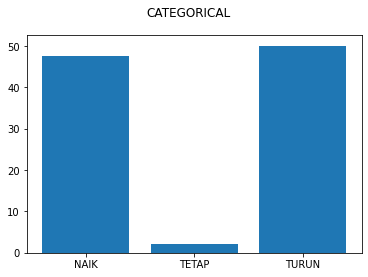

In [46]:
names = ['NAIK', 'TETAP', 'TURUN']
values = [(predictes_naik*100), (predictes_tetap*100), (predictes_turun*100)]

plt.bar(names, values)
plt.suptitle('CATEGORICAL')
plt.show()

#### Membuat data sampel untuk testing

In [47]:
# Membuat DATA SAMPEL untuk pengujian data
# X = yang akan di gunakan
closed, open, high, low, volume = 7075, 7280, 7300, 7060, 66.43

# Y = yang akan di gunakan
predict_result = ''

#### Mencari probabilitas di setiap kolom yang digunakan

##### Harga Terkahir (Closed Price)

In [48]:
# Mencari Probabilitas di setiap kolom
# Terkahir (Closed Price)
def prob(stdev, sampel, mean):
  result = 1 / np.sqrt(2 * 3.14 * stdev) * np.exp(-(pow(sampel - mean, 2))/pow(stdev, 2))
  return result

prob_closedPrice_naik = prob(std_closedPrice_naik, closed, mean_closedPrice_naik)
prob_closedPrice_tetap = prob(std_closedPrice_tetap, closed, mean_closedPrice_tetap)
prob_closedPrice_turun = prob(std_closedPrice_turun, closed, mean_closedPrice_turun)

print('---- PROBABILITAS HARGA TERAKHIR (Closed Price) ----')
print("NAIK  : ", prob_closedPrice_naik)
print("TETAP : ", prob_closedPrice_tetap)
print("TURUN : ", prob_closedPrice_turun)

---- PROBABILITAS HARGA TERAKHIR (Closed Price) ----
NAIK  :  3.415834071926882e-33
TETAP :  1.8046316871142776e-48
TURUN :  9.833525980122385e-35


##### Harga Pembukaan (Open Price)

In [49]:
prob_openPrice_naik = prob(std_openPrice_naik, open, mean_openPrice_naik)
prob_openPrice_tetap = prob(std_openPrice_tetap, open, mean_openPrice_tetap)
prob_openPrice_turun = prob(std_openPrice_turun, open, mean_openPrice_turun)

print('---- PROBABILITAS HARGA PEMBUKAAN (Open Price) ----')
print("NAIK  : ", prob_openPrice_naik)
print("TETAP : ", prob_openPrice_tetap)
print("TURUN : ", prob_openPrice_turun)

---- PROBABILITAS HARGA PEMBUKAAN (Open Price) ----
NAIK  :  2.5019531555608976e-38
TETAP :  9.351021239739219e-50
TURUN :  9.955834143674606e-38


##### Harga Tertinggi (High Price)

In [50]:
prob_highPrice_naik = prob(std_highPrice_naik, high, mean_highPrice_naik)
prob_highPrice_tetap = prob(std_highPrice_tetap, high, mean_highPrice_tetap)
prob_highPrice_turun = prob(std_highPrice_turun, high, mean_highPrice_turun)

print('---- PROBABILITAS HARGA TERTINGGI (High Price) ----')
print("NAIK  : ", prob_highPrice_naik)
print("TETAP : ", prob_highPrice_tetap)
print("TURUN : ", prob_highPrice_turun)

---- PROBABILITAS HARGA TERTINGGI (High Price) ----
NAIK  :  6.526533923168632e-36
TETAP :  4.702241148225322e-53
TURUN :  6.177774903323232e-39


##### Harga Terendah (Low Price)

In [51]:
prob_lowPrice_naik = prob(std_lowPrice_naik, low, mean_lowPrice_naik)
prob_lowPrice_tetap = prob(std_lowPrice_tetap, low, mean_lowPrice_tetap)
prob_lowPrice_turun = prob(std_lowPrice_turun, low, mean_lowPrice_turun)

print('---- PROBABILITAS HARGA TERENDAH (Low Price) ----')
print("NAIK  : ", prob_lowPrice_naik)
print("TETAP : ", prob_lowPrice_tetap)
print("TURUN : ", prob_lowPrice_turun)

---- PROBABILITAS HARGA TERENDAH (Low Price) ----
NAIK  :  1.875510616013161e-36
TETAP :  2.4802524084838816e-42
TURUN :  3.265926397195519e-36


##### Volume

In [52]:
prob_volume_naik = prob(std_volume_naik, volume, mean_volume_naik)
prob_volume_tetap = prob(std_volume_tetap, volume, mean_volume_tetap)
prob_volume_turun = prob(std_volume_turun, volume, mean_volume_turun)

print('---- PROBABILITAS VOLUME (VOLUME) ----')
print("NAIK  : ", prob_volume_naik)
print("TETAP : ", prob_volume_tetap)
print("TURUN : ", prob_volume_turun)

---- PROBABILITAS VOLUME (VOLUME) ----
NAIK  :  0.013566938701613239
TETAP :  0.010802687132693167
TURUN :  0.01408479818994753


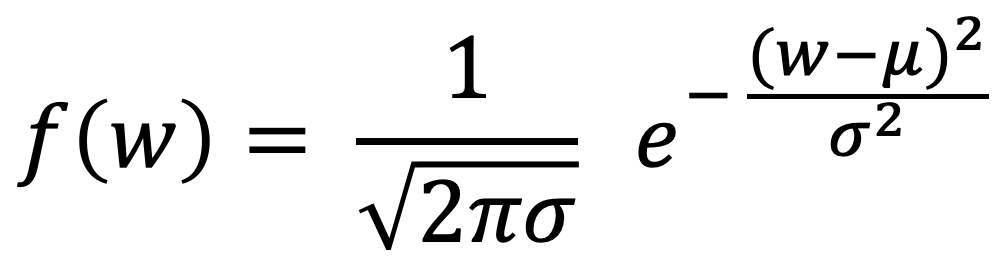

#### Hasil akhir klasifikasi

In [53]:
# HASIL KLASIFIKASI

naik = prob_closedPrice_naik * prob_openPrice_naik * prob_highPrice_naik * prob_lowPrice_naik * prob_volume_naik
tetap = prob_closedPrice_tetap * prob_openPrice_tetap * prob_highPrice_tetap * prob_lowPrice_tetap * prob_volume_tetap
turun = prob_closedPrice_turun * prob_openPrice_turun * prob_highPrice_turun * prob_lowPrice_turun * prob_volume_turun

def categoryClas(x, y, z):
  if x > y and x > z:
    result = 'NAIK'
  elif y > x and y > z:
    result = 'TETAP'
  elif z > x and z > y:
    result = 'TURUN'
  
  return result

print('----- HASIL KLASIFIKASI ----')
print('NAIK   : ', format(float(naik), '.12f'))
print('TETAP  : ', format(float(tetap), '.12f'))
print('TURUN  : ', format(float(turun), '.12f'))
print('----- -------------------- ----')
print('Berdasarkan hasil klasifikasi maka yang terbesar adalah hasil \nakhirnya yang akan menjadi prediksi selanjutnya')

print('RESULT : ', categoryClas(naik, tetap, turun))


----- HASIL KLASIFIKASI ----
NAIK   :  0.000000000000
TETAP  :  0.000000000000
TURUN  :  0.000000000000
----- -------------------- ----
Berdasarkan hasil klasifikasi maka yang terbesar adalah hasil 
akhirnya yang akan menjadi prediksi selanjutnya
RESULT :  NAIK


In [54]:
X = df.iloc[:, [2,3,4,5,6]]
y = df.iloc[:, -1]

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [56]:
# Kita akan menggunakan CategoricalNB untuk kasus ini
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score

# Inisasi CategoricalNB
cnb = CategoricalNB()

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
cnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = cnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = cnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.925
Hasil akurasi data test: 0.5494505494505495


### REGRESI MULTI

In [57]:
import numpy as np
import pandas as pd
columns = [0,1,2,3,4,5,6,7,8]
df = df[['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah', 'Vol.', 'Predict']].to_numpy()
pd.DataFrame(df).head(10)

,0,1,2,3,4,5
0,4580.0,4580.0,4610.0,4560.0,71.99,Tetap
1,4580.0,4620.0,4640.0,4550.0,156.89,Turun
2,4650.0,4620.0,4650.0,4590.0,153.24,Naik
3,4530.0,4560.0,4580.0,4520.0,173.83,Turun
4,4650.0,4600.0,4650.0,4600.0,94.72,Naik
5,4620.0,4690.0,4690.0,4610.0,81.05,Turun
6,4690.0,4650.0,4690.0,4610.0,84.93,Naik
7,4650.0,4650.0,4660.0,4610.0,73.01,Turun
8,4650.0,4630.0,4660.0,4590.0,147.39,Naik
9,4610.0,4680.0,4680.0,4570.0,145.3,Turun


In [85]:
# split dataset into train and test set by ration 70/30
import random
threshold = int(len(df) * 0.7)
randomArray = [True if i < threshold else False for i in range(len(df))]
random.shuffle(randomArray)
randomArray = list(zip(randomArray, df.tolist()))
data_set = np.array(list(map(lambda y: y[1], filter(lambda x: x[0] == False, randomArray))))
test_set = np.array(list(map(lambda y: y[1], filter(lambda x: x[0] == False, randomArray))))
train_set = np.array(list(map(lambda y: y[1], filter(lambda x: x[0] == True, randomArray))))
print(f"train_set size: {len(train_set)}, test_set size: {len(test_set)}")

train_set size: 315, test_set size: 136


In [71]:
featureCounts = len(df[0])-1
X_reg = data_set[:, :featureCounts]
y_reg = data_set[:, [5]]
X_train = train_set[:, :featureCounts]
Y_train = train_set[:, featureCounts]
X_test = test_set[:, :featureCounts]
Y_test = test_set[:, featureCounts]
pd.DataFrame(X_reg).head()

,0,1,2,3,4
0,4530.0,4560.0,4580.0,4520.0,173.83
1,4690.0,4650.0,4690.0,4610.0,84.93
2,4650.0,4650.0,4660.0,4610.0,73.01
3,4650.0,4630.0,4660.0,4590.0,147.39
4,4660.0,4690.0,4700.0,4630.0,214.44


In [72]:
pd.DataFrame(y_reg).head()

,0
0,Turun
1,Naik
2,Turun
3,Naik
4,Naik


In [73]:
def normalize(data):
    data = data.astype(float)
    return (data - np.mean(data,axis=0)) / np.std(data, axis=0)

X_train = normalize(X_train)
X_test = normalize(X_test)
X_train = np.column_stack((np.ones((len(X_train), 1)), X_train))
X_test = np.column_stack((np.ones((len(X_test), 1)), X_test))

In [74]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def specificClass(y, j):
    return

In [75]:
# calculate hypothesis for logistic regression
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

In [76]:
datas = ["TETAP","NAIK","NAIK","TURUN","TETAP","NAIK","TETAP"]
list(set(datas))

['NAIK', 'TETAP', 'TURUN']

In [77]:
def gradientDescent(x, y, alpha, iter):
  n = x.shape[1]                             # get features count
  theta = np.zeros(n)                        # initialize theta
  for i in range(iter):
      theta = theta - alpha * np.dot(x.T, (hypothesis(x, theta) - y))
  return theta

In [78]:
# extract special label from Y_train
def desireY(y, specificClass):
    return np.asarray(list(map(lambda x: [1] if (x[0] == specificClass) else [0], y)))

In [93]:
def gradientDescent(X, y, alpha, itr):
    n = X.shape[1]
    classes = list(set(y))
    thetas = []
    for j in range(len(classes)):
        theta = np.zeros((n, 1))
        innerY = np.asarray(list(map(lambda x: [1] if (x[0] == classes[j]) else [0], y)))
        m = len(innerY)
        for i in range(itr):
            theta = theta - (alpha * (1 / m * (np.dot(X.T, (sigmoid(np.dot(X, theta)) - innerY)))))
        thetas.append(theta.flatten())
    return thetas, classes


thetas, classes = gradientDescent(X_train, Y_train, 0.3, 451)
training_test = (10 * 2) * 1.5
thetas

[array([-4.88318946e+00, -7.16036374e-15,  5.75136698e-15,  3.50138784e-15,
        -2.02464434e-15,  3.64199411e-17]),
 array([-4.88318946e+00, -7.16036374e-15,  5.75136698e-15,  3.50138784e-15,
        -2.02464434e-15,  3.64199411e-17]),
 array([-4.88318946e+00, -7.16036374e-15,  5.75136698e-15,  3.50138784e-15,
        -2.02464434e-15,  3.64199411e-17])]

In [94]:
def predict(X, theta):
    p = sigmoid(X @ np.asarray(theta).T)
    p = np.asarray(list(map(lambda x: np.argmax(x), p)))
    return p

train_set_value = list(map(lambda x: classes[x], predict(X_train, thetas)))
train_set_percent = sum(train_set_value == Y_train) / len(Y_train) * training_test
print(f"Accuracy for Train Set: {train_set_percent}")

test_set_value = list(map(lambda x: classes[x], predict(X_test, thetas)))
test_set_percent = sum(test_set_value == Y_test) / len(Y_test) * training_test
print(f"Accuracy for Test Set: {test_set_percent}")

Accuracy for Train Set: 0.9333333333333333
Accuracy for Test Set: 0.39823008849557523
